# Bonstons

#### Imports di base

In [134]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("C:/Users/giann/Documents/GitHub/Bostonshouse/boston.csv")

### Ricerca delle features più adeguate

Colonna 'CRIM': 1 correlazioni forti
RAD    0.625505
Name: CRIM, dtype: float64
----------------------------------------
Colonna 'ZN': 1 correlazioni forti
DIS    0.664408
Name: ZN, dtype: float64
----------------------------------------
Colonna 'INDUS': 5 correlazioni forti
NOX      0.763651
TAX      0.720760
AGE      0.644779
LSTAT    0.603800
DIS     -0.708027
Name: INDUS, dtype: float64
----------------------------------------
Colonna 'CHAS': 0 correlazioni forti
Colonna 'NOX': 5 correlazioni forti
INDUS    0.763651
AGE      0.731470
TAX      0.668023
RAD      0.611441
DIS     -0.769230
Name: NOX, dtype: float64
----------------------------------------
Colonna 'RM': 2 correlazioni forti
MEDV     0.695360
LSTAT   -0.613808
Name: RM, dtype: float64
----------------------------------------
Colonna 'AGE': 4 correlazioni forti
NOX      0.731470
INDUS    0.644779
LSTAT    0.602339
DIS     -0.747881
Name: AGE, dtype: float64
----------------------------------------
Colonna 'DIS': 4 correl

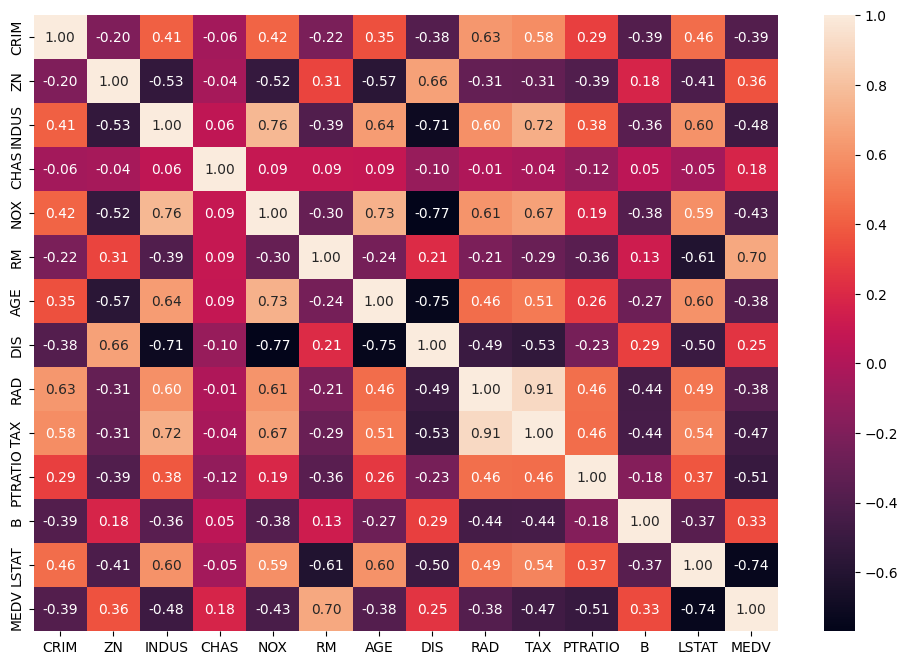

In [135]:
corr = df.corr()
# Stampa tutte le correlazioni con valore alto per ogni colonna
for col in corr.columns:
    high_corr = corr[col][(corr[col].abs() > 0.6) & (corr[col].abs() < 1)]
    high_corr = high_corr.reindex(high_corr.sort_values(ascending=False).index)
    print(f"Colonna '{col}': {len(high_corr)} correlazioni forti")
    if not high_corr.empty:
        print(high_corr)
        print("-" * 40)

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

Con i dati qui sopra scegliamo le features RM e LSTAT. Sono quelle con le correlazioni più alte.

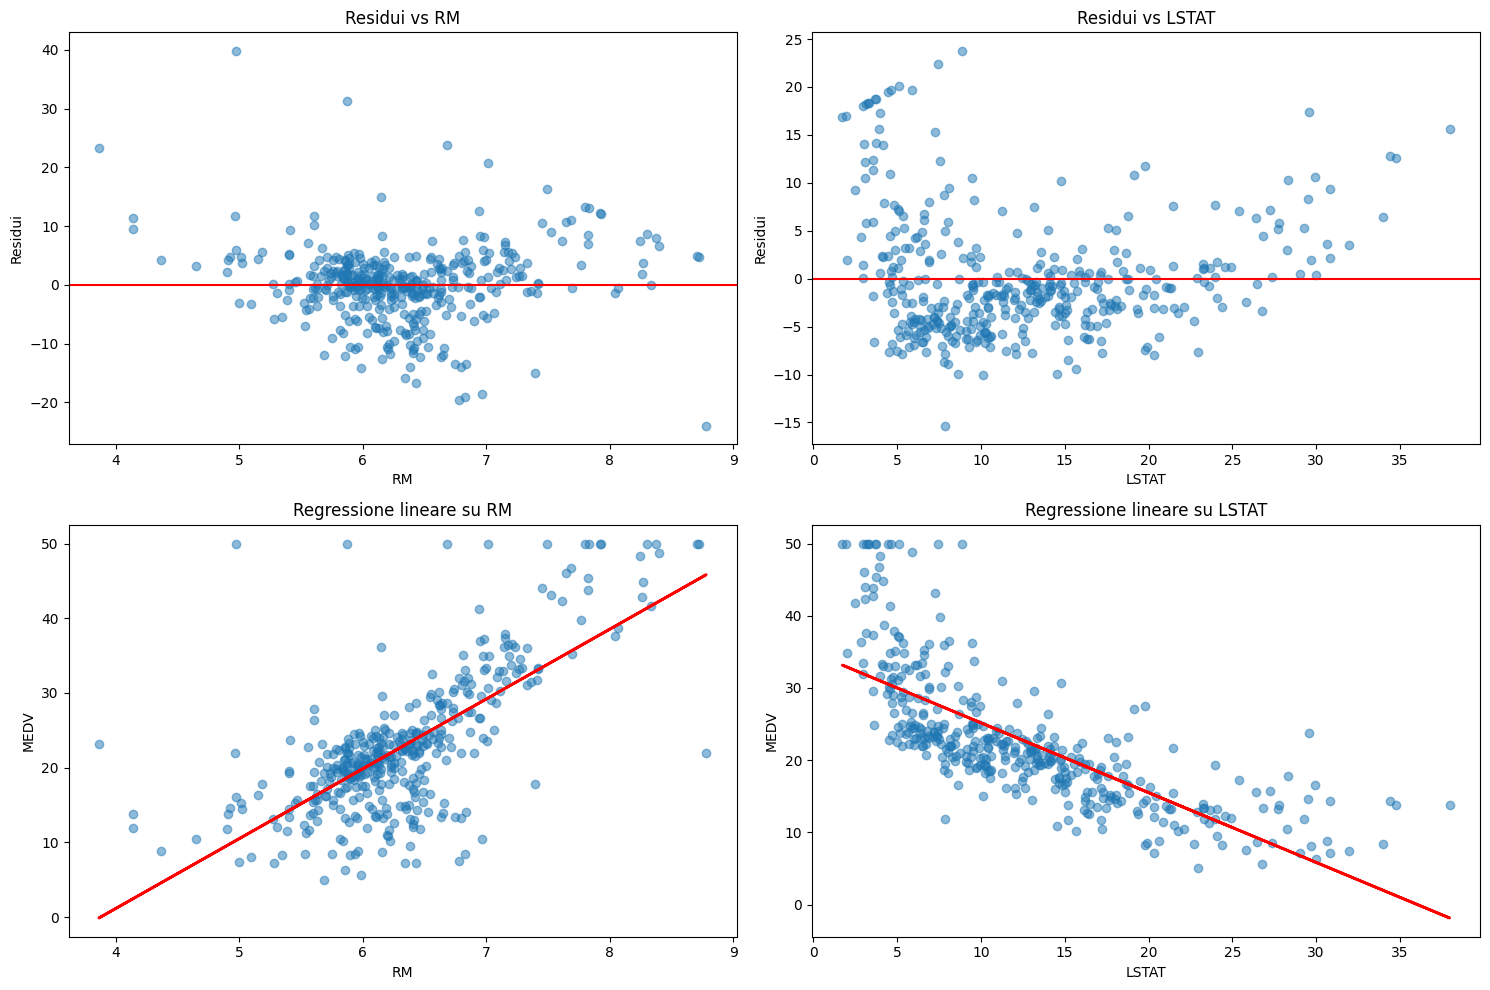

In [136]:
X = df[['RM', 'LSTAT']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardizza i dati
# Prima del loop
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Nel loop usare X_train_scaled e X_test_scaled al posto di X_train e X_test
# Verifica della non-linearità con regressione lineare semplice
plt.figure(figsize=(15, 10))

for i, feature in enumerate(['RM', 'LSTAT']):
    # Regressione lineare su una singola feature
    X_single = X_train[[feature]]
    model = LinearRegression().fit(X_single, y_train)
    y_pred = model.predict(X_single)
    
    # Calcolo dei residui
    residuals = y_train - y_pred
    
    # Plot dei residui
    plt.subplot(2, 2, i+1)
    plt.scatter(X_train[feature], residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel(feature)
    plt.ylabel('Residui')
    plt.title(f'Residui vs {feature}')
    
    # Plot della regressione
    plt.subplot(2, 2, i+3)
    plt.scatter(X_train[feature], y_train, alpha=0.5)
    plt.plot(X_train[feature], y_pred, color='r', linewidth=2)
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.title(f'Regressione lineare su {feature}')

plt.tight_layout()
plt.show()

## Regressione non lineare

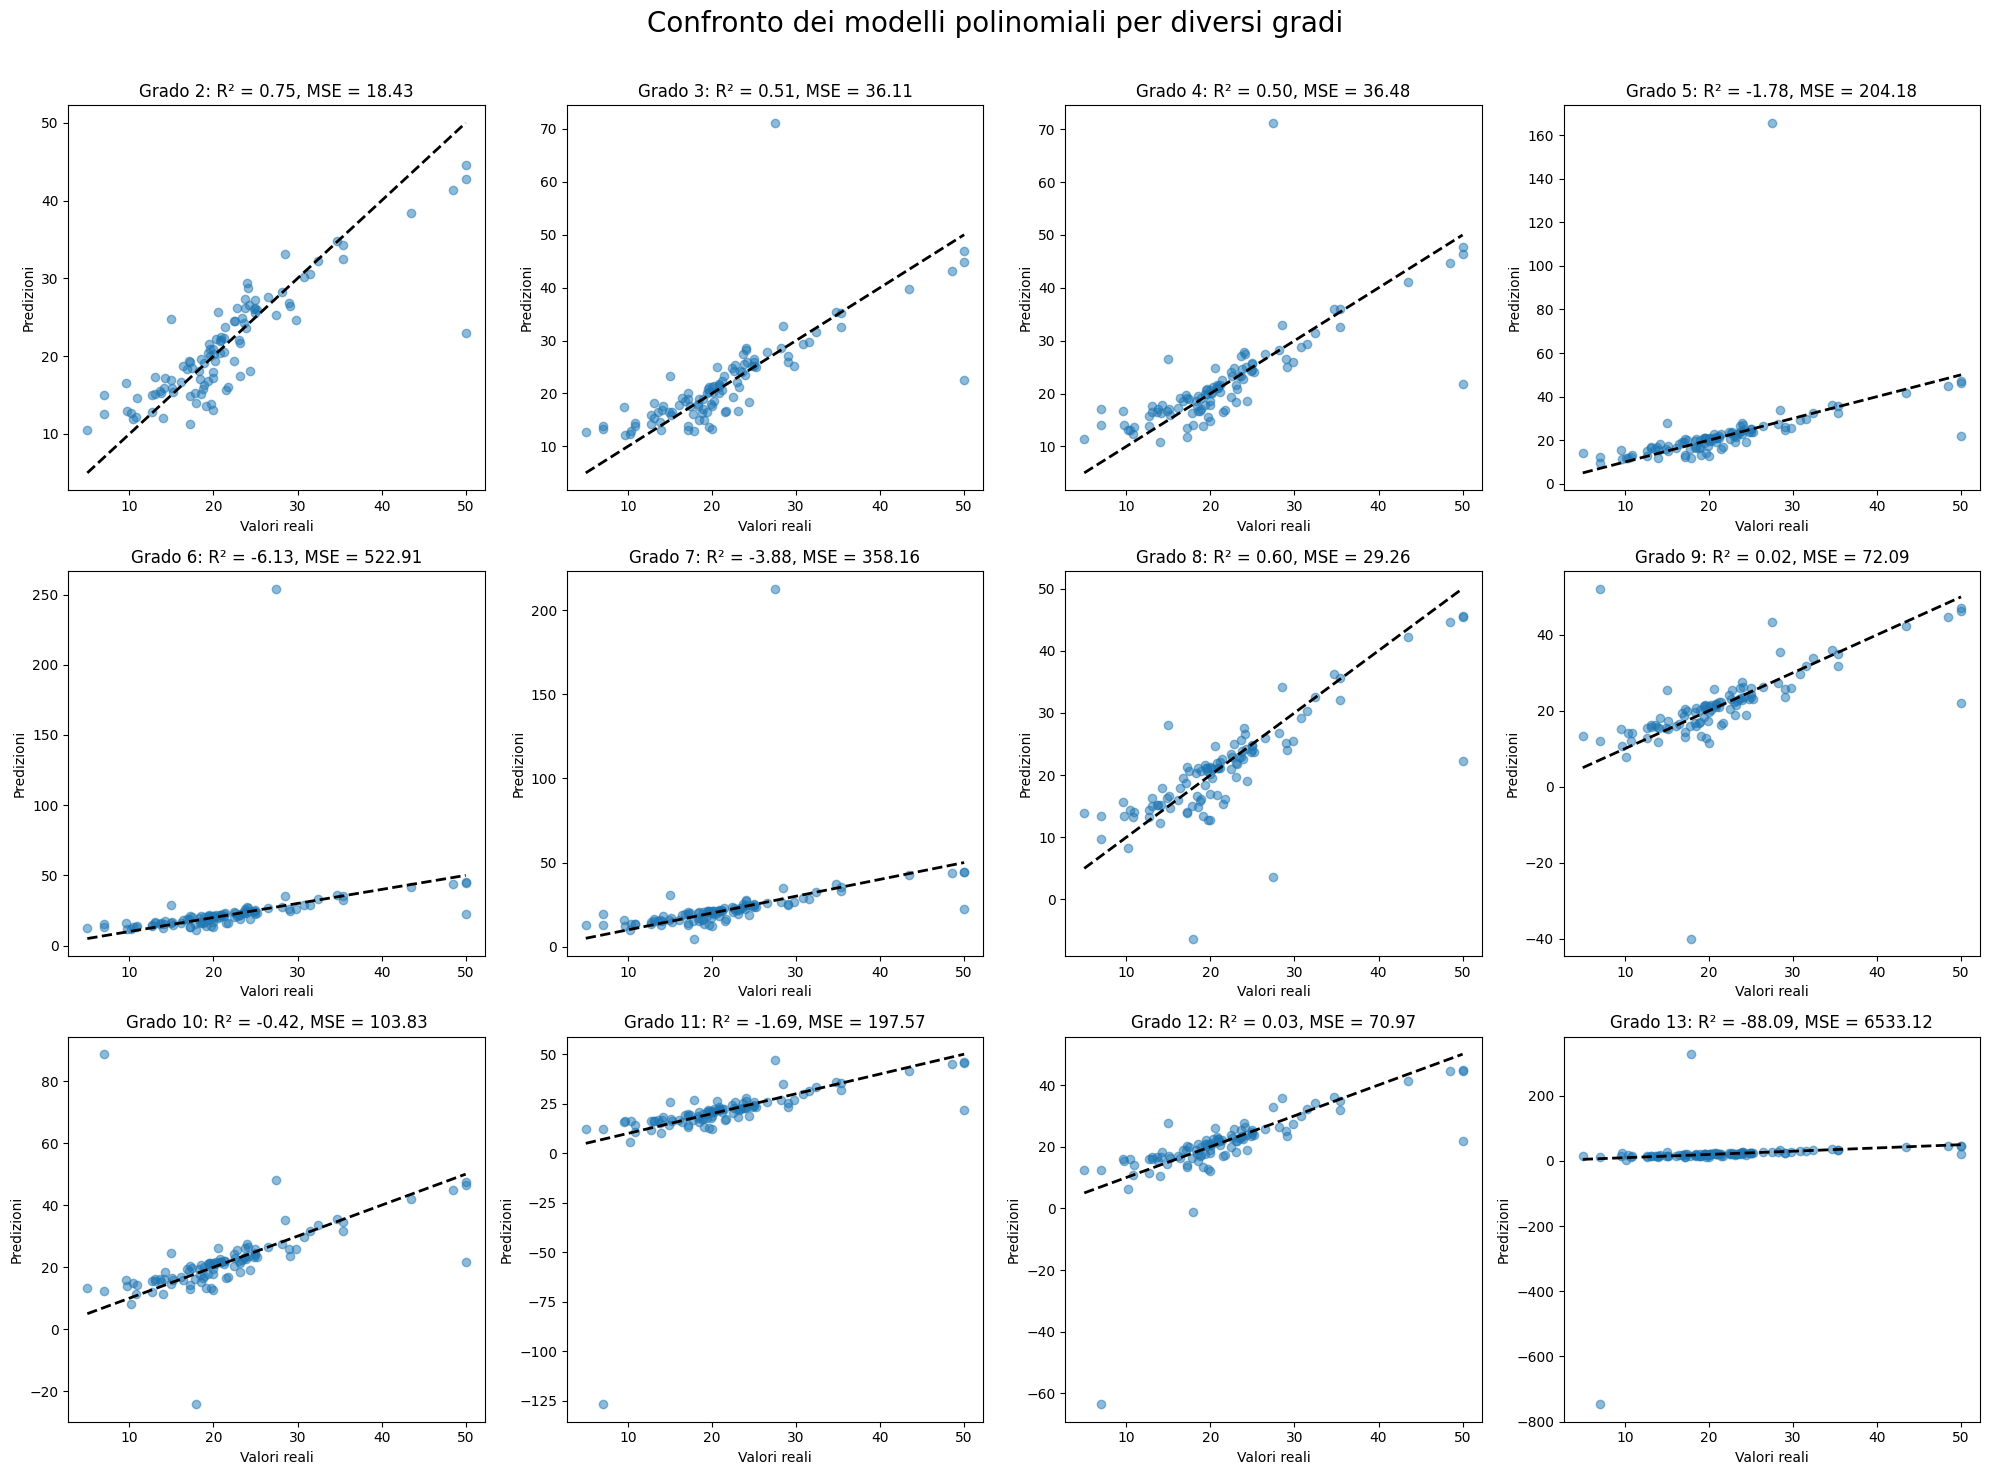

In [137]:

degrees = range(2, 14)
results = []
predictions = []

plt.figure(figsize=(20, 15))
for i, degree in enumerate(degrees):
    # Creazione e addestramento del modello
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # NON SCALATI
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # SCALATI
    # model.fit(X_train_scaled, y_train)
    # y_pred = model.predict(X_test_scaled)
    
    
    # Salva le predizioni e i risultati per dopo
    predictions.append(y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results.append({'Grado': degree, 'mse': mse, 'r2': r2, 'mae': mae})
    
    # Crea un subplot per ogni grado
    plt.subplot(3, 4, i+1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Valori reali')
    plt.ylabel('Predizioni')
    plt.title(f'Grado {degree}: R² = {r2:.2f}, MSE = {mse:.2f}')
    

plt.suptitle('Confronto dei modelli polinomiali per diversi gradi', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

#### Tabella del confronto dei risultati

,Grado,mse,r2,mae
0,2,18.433778,0.748632,2.883347
1,3,36.114983,0.507526,3.175291
2,4,36.483673,0.502498,3.092192
3,5,204.180231,-1.784259,3.893161
4,6,522.912625,-6.130583,4.961402
5,7,358.163113,-3.884012,4.685085
6,8,29.260338,0.600998,3.143794
7,9,72.090841,0.016949,3.683711
8,10,103.825327,-0.415791,3.988781
9,11,197.574350,-1.694179,4.307661


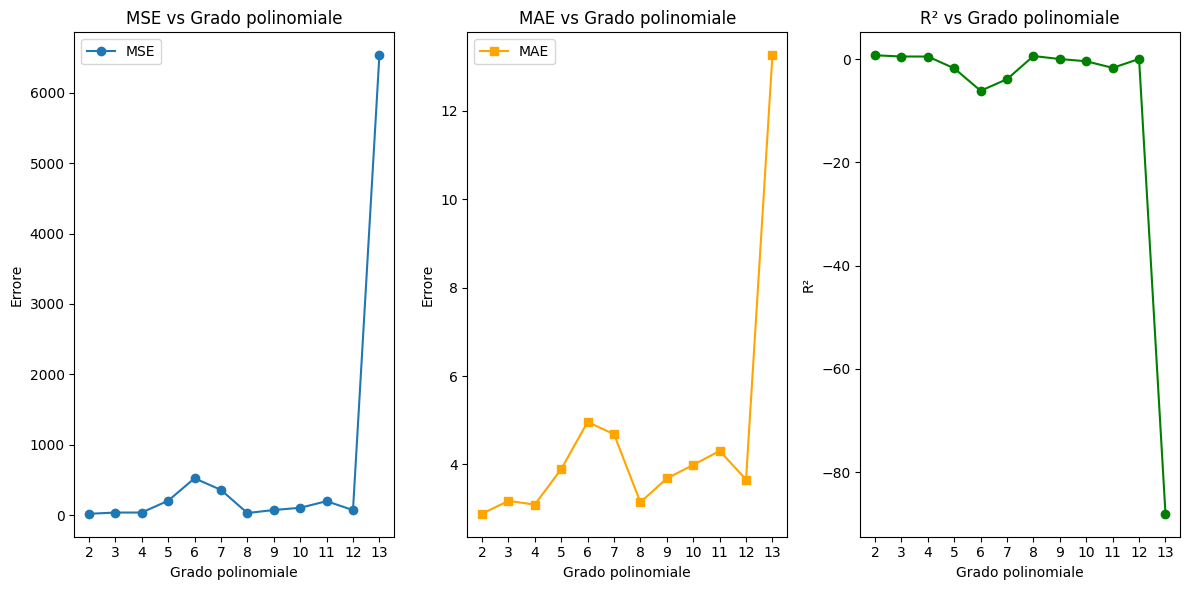

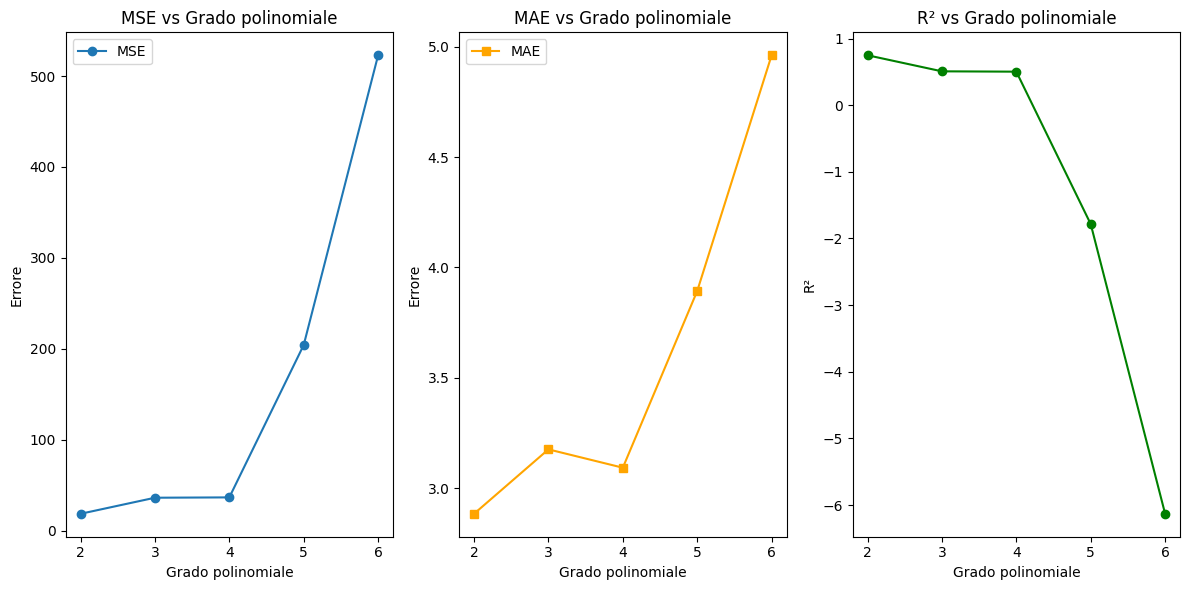

In [138]:
results_df = pd.DataFrame(results)
display(results_df)
plt.figure(figsize=(12, 6))

# MSE
plt.subplot(1, 3, 1)
plt.plot(degrees, [r['mse'] for r in results], 'o-', label='MSE')
plt.xlabel('Grado polinomiale')
plt.ylabel('Errore')
plt.legend()
plt.title('MSE vs Grado polinomiale')
plt.xticks(list(degrees))

# MAE
plt.subplot(1, 3, 2)
plt.plot(degrees, [r['mae'] for r in results], 's-', label='MAE', color='orange')
plt.xlabel('Grado polinomiale')
plt.ylabel('Errore')
plt.legend()
plt.title('MAE vs Grado polinomiale')
plt.xticks(list(degrees))

# R²
plt.subplot(1, 3, 3)
plt.plot(degrees, [r['r2'] for r in results], 'o-', color='green')
plt.xlabel('Grado polinomiale')
plt.ylabel('R²')
plt.title('R² vs Grado polinomiale')
plt.xticks(list(degrees))

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
# RANGE LIMITATO PER VISUALIZZARE MEGLIO
limited_degrees = range(2, 7)

# MSE 
plt.subplot(1, 3, 1)
plt.plot(limited_degrees, [results[i-2]['mse'] for i in limited_degrees], 'o-', label='MSE')
plt.xlabel('Grado polinomiale')
plt.ylabel('Errore')
plt.legend()
plt.title('MSE vs Grado polinomiale')
plt.xticks(list(limited_degrees))

# MAE
plt.subplot(1, 3, 2)
plt.plot(limited_degrees, [results[i-2]['mae'] for i in limited_degrees], 's-', label='MAE', color='orange')
plt.xlabel('Grado polinomiale')
plt.ylabel('Errore')
plt.legend()
plt.title('MAE vs Grado polinomiale')
plt.xticks(list(limited_degrees))

# R²
plt.subplot(1, 3, 3)
plt.plot(limited_degrees, [results[i-2]['r2'] for i in limited_degrees], 'o-', color='green')
plt.xlabel('Grado polinomiale')
plt.ylabel('R²')
plt.title('R² vs Grado polinomiale')
plt.xticks(list(limited_degrees))

plt.tight_layout()
plt.show()

### Selezione del miglior modello in base a R²

Il modello migliore ha grado 2 con R² = 0.7486


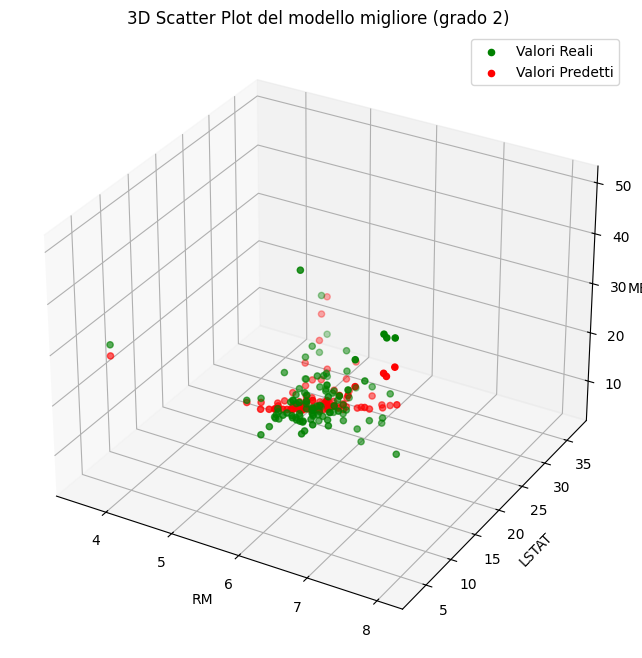

In [139]:
best_idx = max(range(len(results)), key=lambda i: results[i]['r2'])
best_degree = results[best_idx]['Grado']
best_pred = predictions[best_idx]

print(f"Il modello migliore ha grado {best_degree} con R² = {results[best_idx]['r2']:.4f}")

# Visualizza il modello in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['RM'], X_test['LSTAT'], y_test, color='g', label='Valori Reali')
ax.scatter(X_test['RM'], X_test['LSTAT'], best_pred, color='r', label='Valori Predetti')
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
ax.set_title(f'3D Scatter Plot del modello migliore (grado {best_degree})')
plt.legend()
plt.show()

## Extra

##### Grafici relazione tra RM, LSTAT e MEDV

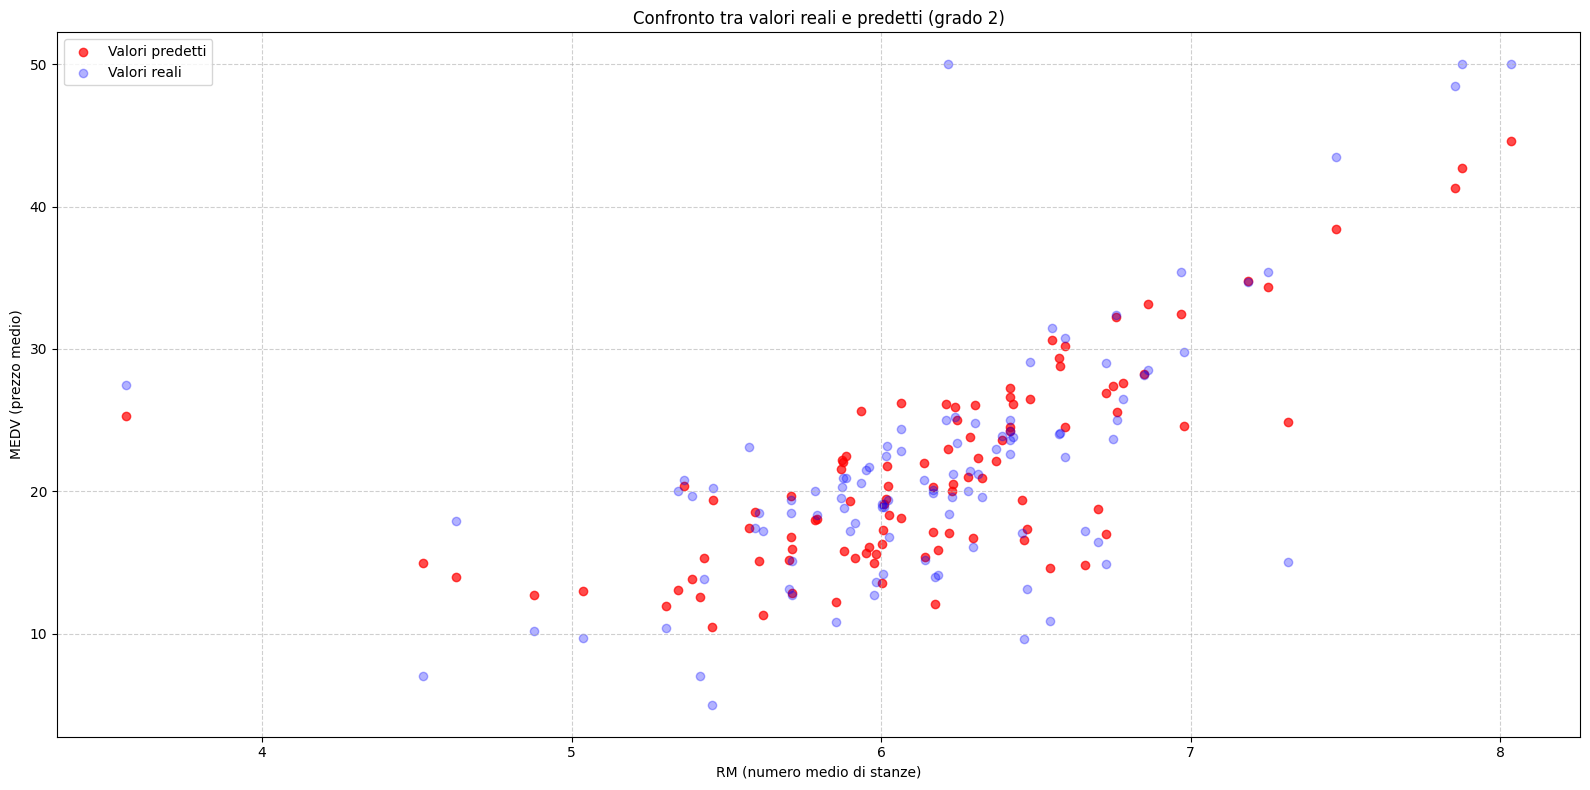

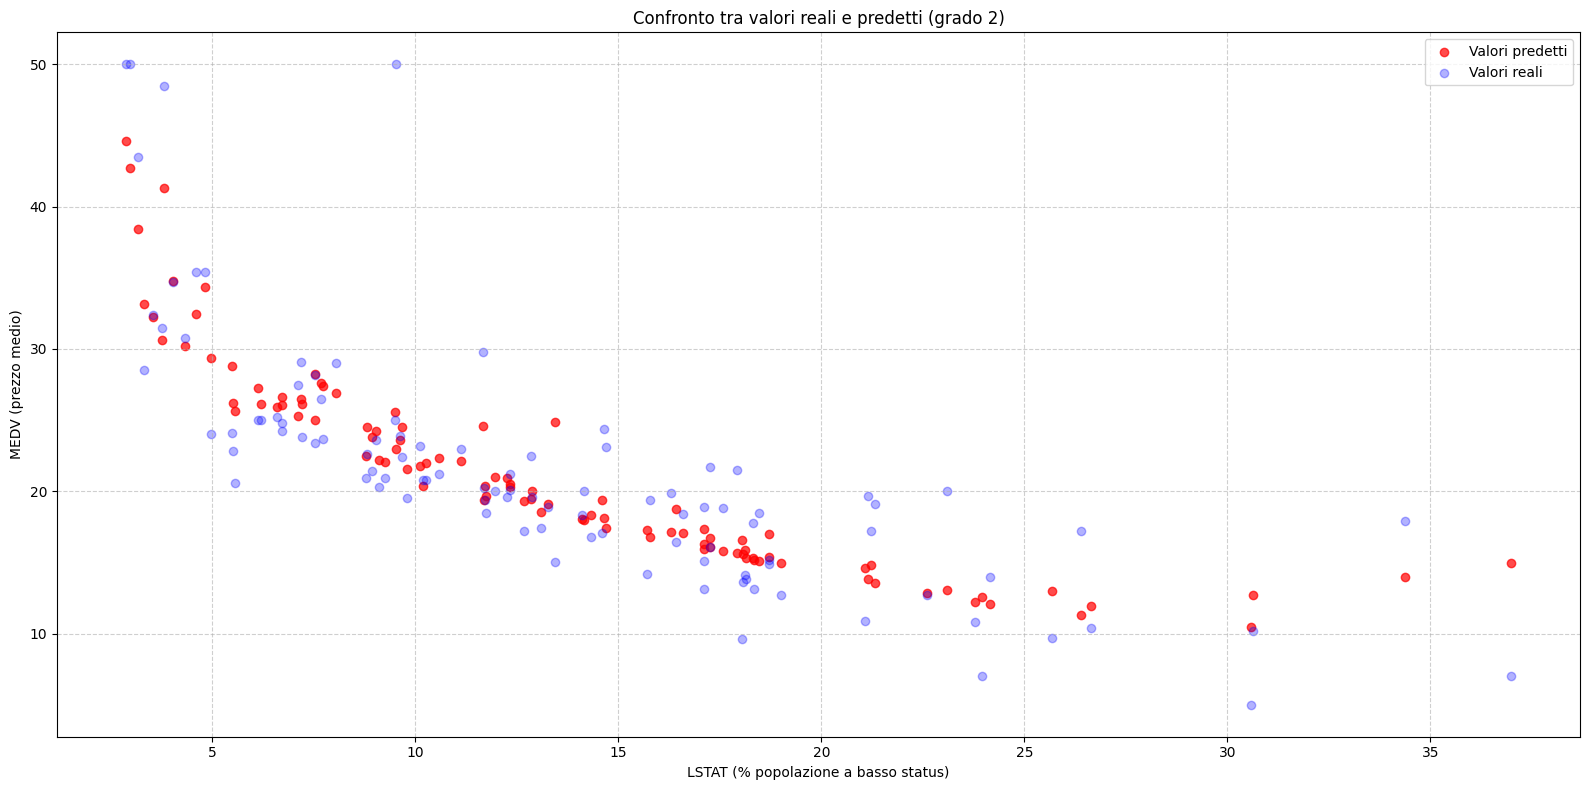

In [140]:
plt.figure(figsize=(16, 8))

# Grafico RM vs MEDV (valori predetti)
plt.scatter(X_test['RM'], best_pred, color='r', alpha=0.7, label='Valori predetti')
plt.scatter(X_test['RM'], y_test, color='b', alpha=0.3, label='Valori reali')
plt.xlabel('RM (numero medio di stanze)')
plt.ylabel('MEDV (prezzo medio)')
plt.title(f'Confronto tra valori reali e predetti (grado {best_degree})')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 8))

# Grafico LSTAT vs MEDV (valori predetti)
plt.scatter(X_test['LSTAT'], best_pred, color='r', alpha=0.7, label='Valori predetti')
plt.scatter(X_test['LSTAT'], y_test, color='b', alpha=0.3, label='Valori reali')
plt.xlabel('LSTAT (% popolazione a basso status)')
plt.ylabel('MEDV (prezzo medio)')
plt.title(f'Confronto tra valori reali e predetti (grado {best_degree})')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

##### Calcolo residui (Reali - Predetti)

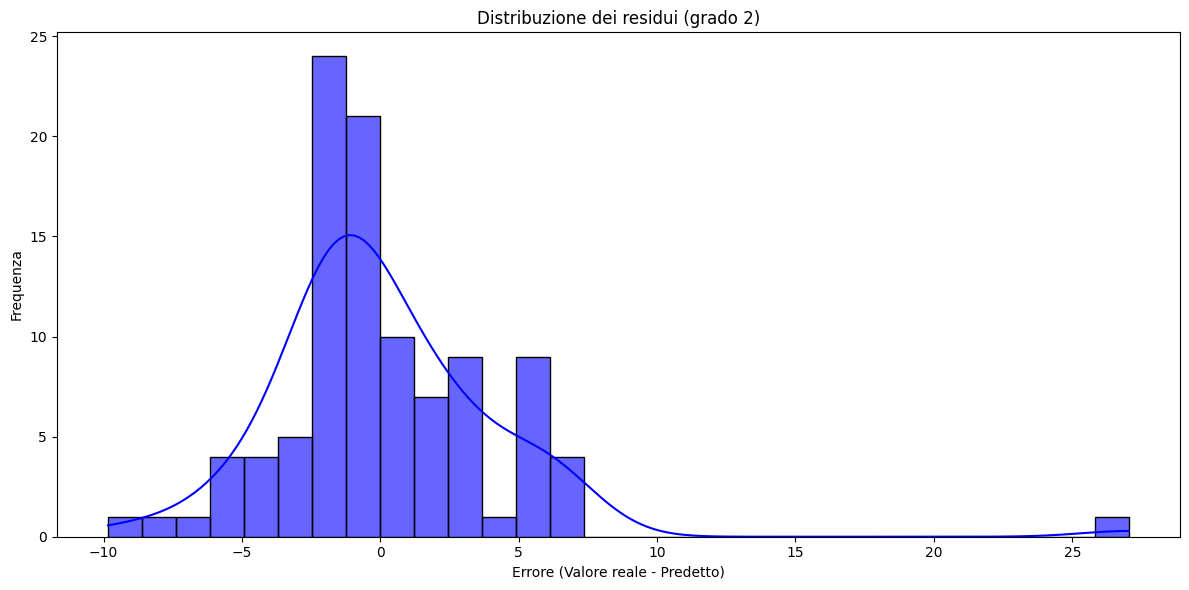

In [141]:
best_residuals = y_test - best_pred

plt.figure(figsize=(12, 6))
sns.histplot(best_residuals, kde=True, bins=30, color='blue', alpha=0.6)
plt.title(f"Distribuzione dei residui (grado {best_degree})")
plt.xlabel("Errore (Valore reale - Predetto)")
plt.ylabel("Frequenza")
plt.tight_layout()

plt.show()